This Notebook is for the calculation of the COM trajectory and end effector of swing leg trajectory for the multiple step of biped walkig using 3DLIPM

In [23]:
from math import pi ,sin 
import math 
#cvp stands for cosign velocity profile
def cvp( x0 ,xf , tf,t0):
    l = (xf -x0)/tf
    w = (2*pi)/tf

    t = 0
    dt = tf/100
    t_data = []

    x_data = []

    while t <= tf+dt :

        x = l*t + x0 - ( l* sin(w*t) /w)
        x_data.append(x)
        t_data.append(t+t0)
        t += dt
    return x_data , t_data

In [24]:
# The COM Trajectory
import math as m 
def com_traj(ti,td,x0,xf,y0,yf):

  g= 9.8
  zc=0.8
  Tc=m.sqrt(zc/g)

  C = m.cosh(td/Tc)
  S = m.sinh(td/Tc)

  x0_dot = (xf - x0*C)/(Tc*S)
  y0_dot = (yf - y0*C)/(Tc*S)
  
  t = 0
  dt = td/100

  t_com = []
  y_com = []
  x_com = []
  z_com = []
  while t <= td+dt:
    x=(x0*m.cosh((t/Tc)) ) + (Tc*x0_dot*m.sinh((t/Tc)))
    y=(y0*m.cosh((t/Tc)) ) + (Tc*y0_dot*m.sinh((t/Tc)))
    y_com.append(y)
    x_com.append(x)
    t_com.append(t+(ti))
    z_com.append(zc)
    t+=dt
#   if x0==xf:
#     x_com = cvp( x0 ,xf , td,ti)
#   if ti == 0:
#     y_com = cvp( y0 ,yf , td,ti)

  return z_com, y_com ,x_com , t_com 

def com_traj2(ti,td,x0,xf,y0,yf):

    g= 9.8
    zc=0.8

    x_com ,t_com = cvp( x0 ,xf , td,ti)
    y_com ,t_com = cvp( y0 ,yf , td,ti)

    z_com = [ zc for _ in range(len(t_com)) ]
    return z_com, y_com ,x_com , t_com 


def const_x( ti,td,x ):
    t = 0
    dt = td/100
    t_com = []

    x_com = []

    while t <= td+dt :

        x_com.append(x)
        t_com.append(t+ti)
        t += dt
    return x_com 




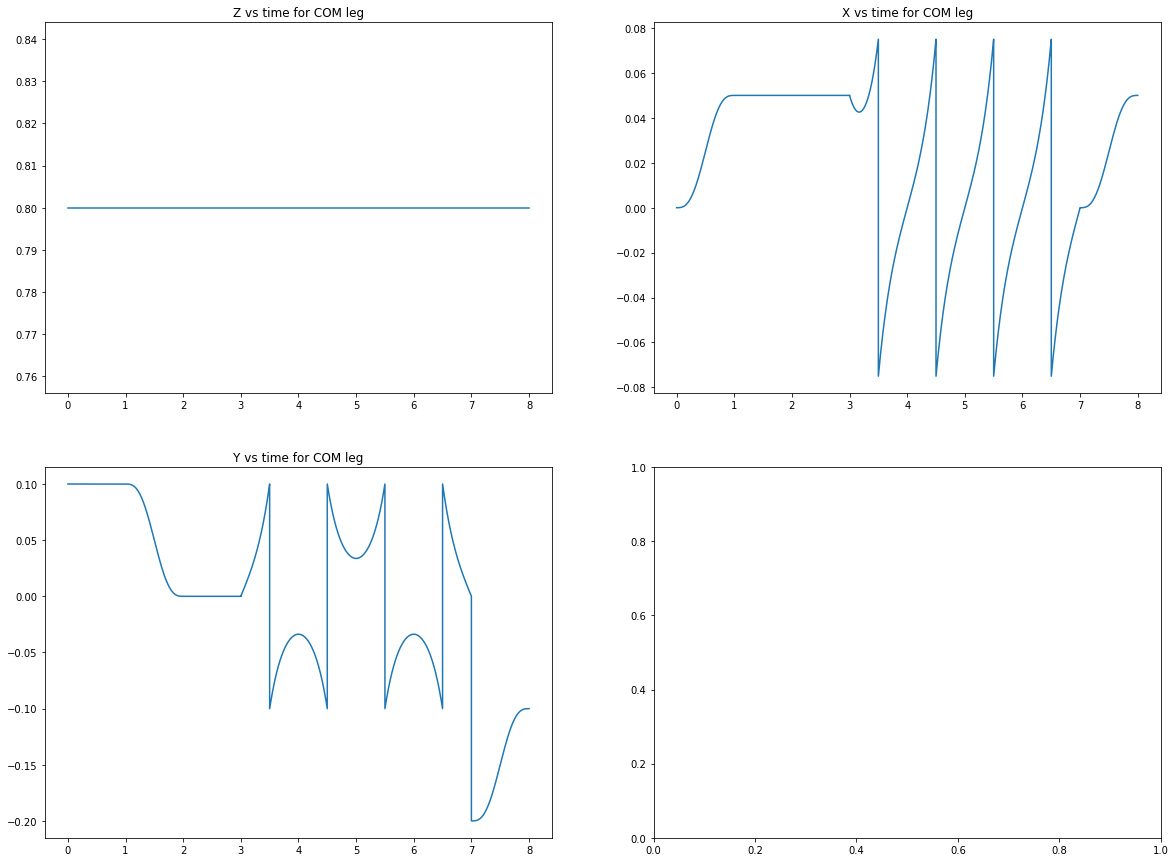

In [25]:
z_com=[]
y_com=[]
x_com=[]
t_com=[]
z_com1, y_com1 , x_com1,t_com1 =com_traj2(0,1,0,0.05,0.1,0.1)
z_com.extend(z_com1)
y_com.extend(y_com1)
x_com.extend(x_com1)
t_com.extend(t_com1)
z_com1, y_com1 , x_com1,t_com1 =com_traj2(1,1,0.05,0.05,0.1,0.0)
z_com.extend(z_com1)
y_com.extend(y_com1)
x_com.extend(x_com1)
t_com.extend(t_com1)
z_com1, y_com1 , x_com1,t_com1 =com_traj2(2,1,0.05,0.05,0.0,0.0)
z_com.extend(z_com1)
y_com.extend(y_com1)
x_com.extend(x_com1)
t_com.extend(t_com1)
z_com1, y_com1 , x_com1,t_com1 =com_traj(3,0.5,0.05,0.075,0.0,0.1)
z_com.extend(z_com1)
y_com.extend(y_com1)
x_com.extend(x_com1)
t_com.extend(t_com1)
z_com1, y_com1 , x_com1,t_com1 =com_traj(3.5,1,-0.075,0.075,-0.1,-0.1)
z_com.extend(z_com1)
y_com.extend(y_com1)
x_com.extend(x_com1)
t_com.extend(t_com1)
z_com1, y_com1 , x_com1,t_com1 =com_traj(4.5,1,-0.075,0.075,0.1,0.1)
z_com.extend(z_com1)
y_com.extend(y_com1)
x_com.extend(x_com1)
t_com.extend(t_com1)
z_com1, y_com1 , x_com1,t_com1 =com_traj(5.5,1,-0.075,0.075,-0.1,-0.1)
z_com.extend(z_com1)
y_com.extend(y_com1)
x_com.extend(x_com1)
t_com.extend(t_com1)
z_com1, y_com1 , x_com1,t_com1 =com_traj(6.5,0.5,-0.075,0,0.1,0)
z_com.extend(z_com1)
y_com.extend(y_com1)
x_com.extend(x_com1)
t_com.extend(t_com1)
z_com1, y_com1 , x_com1,t_com1 =com_traj2(7,1,0,0.05,-0.2,-0.1)
z_com.extend(z_com1)
y_com.extend(y_com1)
x_com.extend(x_com1)
t_com.extend(t_com1)



import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,2,figsize=(20,15))
axes[0,0].set_title("Z vs time for COM leg")
axes[0,0].plot(t_com   , z_com) 
axes[0,1].set_title("X vs time for COM leg")
axes[0,1].plot(t_com   , x_com) 
axes[1,0].set_title("Y vs time for COM leg")
axes[1,0].plot(t_com   , y_com) 
plt.show()

In [26]:
import numpy as np

def bezier( x0 ,xd0 ,xf ,xdf ,tf):

    p = np.array( [
                   [1,0,0,0],
                   [0,1,0,0],
                   [1,tf,tf**2 ,tf**3],
                   [ 0, 1 ,2*tf, 3*(tf**2)]
    ])

    p = np.linalg.inv(p)
    p=p.round(2)
    q = np.array([x0 ,xd0 ,xf ,xdf]).T

    a=np.dot( p,q)
    a=list(a)
    return a


def full_step_up_down(tf,t0):
  x0 ,xd0 ,xf ,xdf  = 0  ,0.0, 0.02 , 0.0 
  a1=bezier( x0 ,xd0 ,xf ,xdf ,tf*0.2)
  x0 ,xd0 ,xf ,xdf  = 0.02  ,0.0, 0.02 , 0.0 
  a2=bezier( x0 ,xd0 ,xf ,xdf ,tf*0.6)
  x0 ,xd0 ,xf ,xdf  = 0.02  ,0.0, 0.0 , 0.0 
  a3=bezier( x0 ,xd0 ,xf ,xdf ,tf*0.2)
  t = 0
  dt = tf/100
  t_data = []
  z_data = []
  while t <= tf+dt :
    if (t<=tf*0.2):
      z = a1[0] + a1[1]*t + a1[2]*(t**2)+ a1[3]*(t**3)
    if (tf*0.2<t<=tf*0.8):
      z = a2[0] + a2[1]*(t-(tf*0.2)) + a2[2]*((t-(tf*0.2)**2))+ a2[3]*((t-(tf*0.2))**3)
    if (0.8*tf<t<=1*tf):
      z = a3[0] + a3[1]*(t-(tf*0.8)) + a3[2]*((t-(tf*0.8))**2)+ a3[3]*((t-(tf*0.8))**3)
    z_data.append(z)
    t_data.append(t+t0)
    t += dt

  return z_data, t_data
def const_z( tf,t0 ):
    t = 0
    dt = tf/100
    t_data = []

    z_data = []

    while t <= tf+dt :

        x = 0
        z_data.append(x)
        t_data.append(t+t0)
        t += dt
    return z_data , t_data
    
def const_y( y0, tf,t0 ):
    t = 0
    dt = tf/100
    
    y_data = []

    while t <= tf+dt :
        y_data.append(y0)
        t += dt
    return y_data

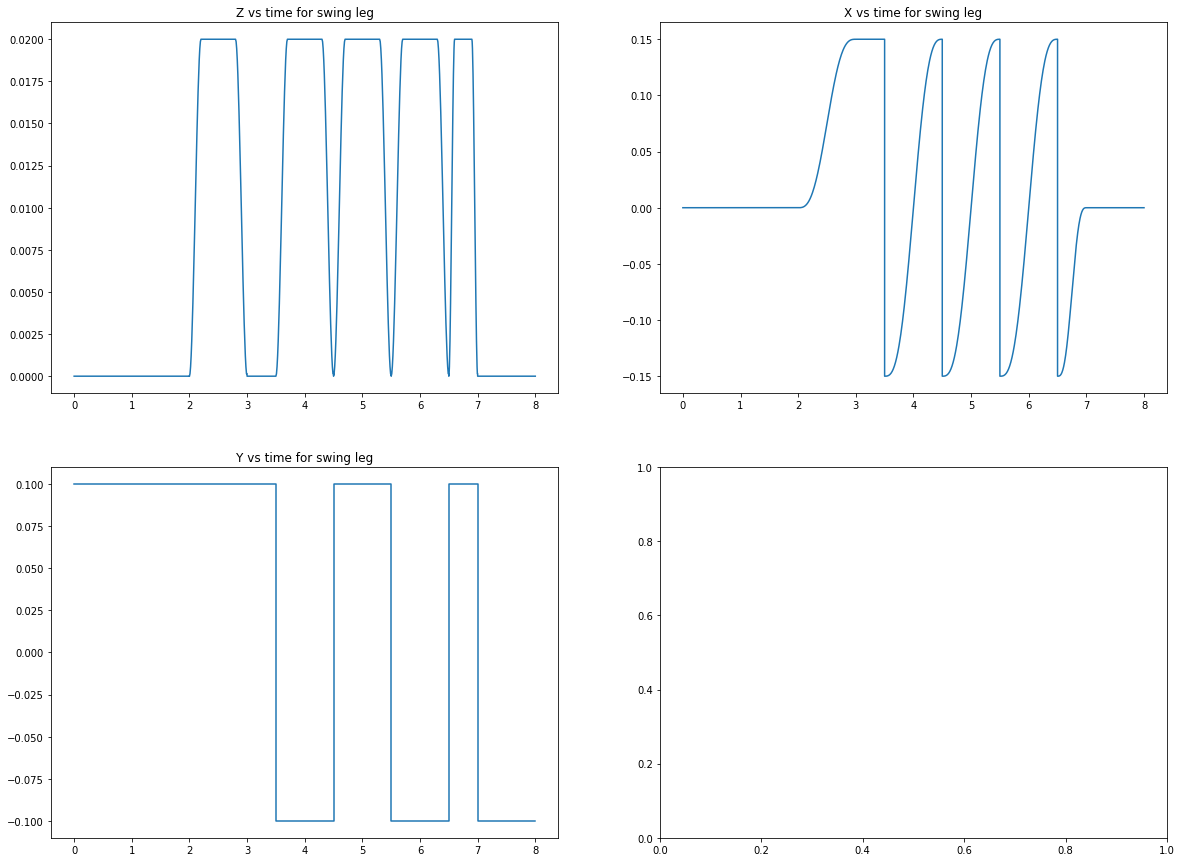

In [27]:

import math as m
def main_call():
  t0=0
  z_data=[]
  t_data=[]

  for i in range(9):
    if t0==3:
      t0=t0
      tf=0.5
      z_data1, t_data1=const_z(tf,t0)
    elif t0==0 or t0==1 or t0==7:
      tf=1
      z_data1, t_data1=const_z(tf,t0)
    elif t0==6.5:
      tf=0.5
      z_data1, t_data1=full_step_up_down(tf,t0)
    else:
      tf=1
      z_data1, t_data1=full_step_up_down(tf,t0)
    z_data.extend(z_data1)
    t_data.extend(t_data1)
    t0=t_data1[-1] 
    t0=round(t0,2)
  x0=[0   ,   0 , 0    , 0.15 , -0.15 , -0.15 , -0.15 , -0.15 , 0   ]
  xf=[0   ,   0 , 0.15 , 0.15 ,  0.15 ,  0.15 ,  0.15 ,    0  , 0   ]
  tf=[1   ,   1 , 1    , 0.5  ,     1 ,     1 ,     1 ,   0.5 , 1   ]
  y =[0.1 , 0.1 , 0.1  , 0.1  ,  -0.1 ,   0.1 ,  -0.1 ,   0.1 , -0.1 ]
  t0=0
  x_data,t_data=[],[]
  y_data = []
  for i in range(9):
    x_data0 , t_data0 = cvp( x0[i] ,xf[i], tf[i],t0)
    y_data0 = const_y( y[i] ,tf[i],t0)
    t0+=tf[i]
    x_data.extend(x_data0)
    t_data.extend(t_data0)
    y_data.extend(y_data0)
  return x_data,y_data ,z_data,t_data


import matplotlib.pyplot as plt
x_data,y_data ,z_data,t_data = main_call()
fig,axes = plt.subplots(2,2,figsize=(20,15))
axes[0,0].set_title("Z vs time for swing leg")
axes[0,0].plot(t_data   , z_data) 
axes[0,1].set_title("X vs time for swing leg")
axes[0,1].plot(t_data   , x_data) 
axes[1,0].set_title("Y vs time for swing leg")
axes[1,0].plot(t_data   , y_data) 
plt.show()


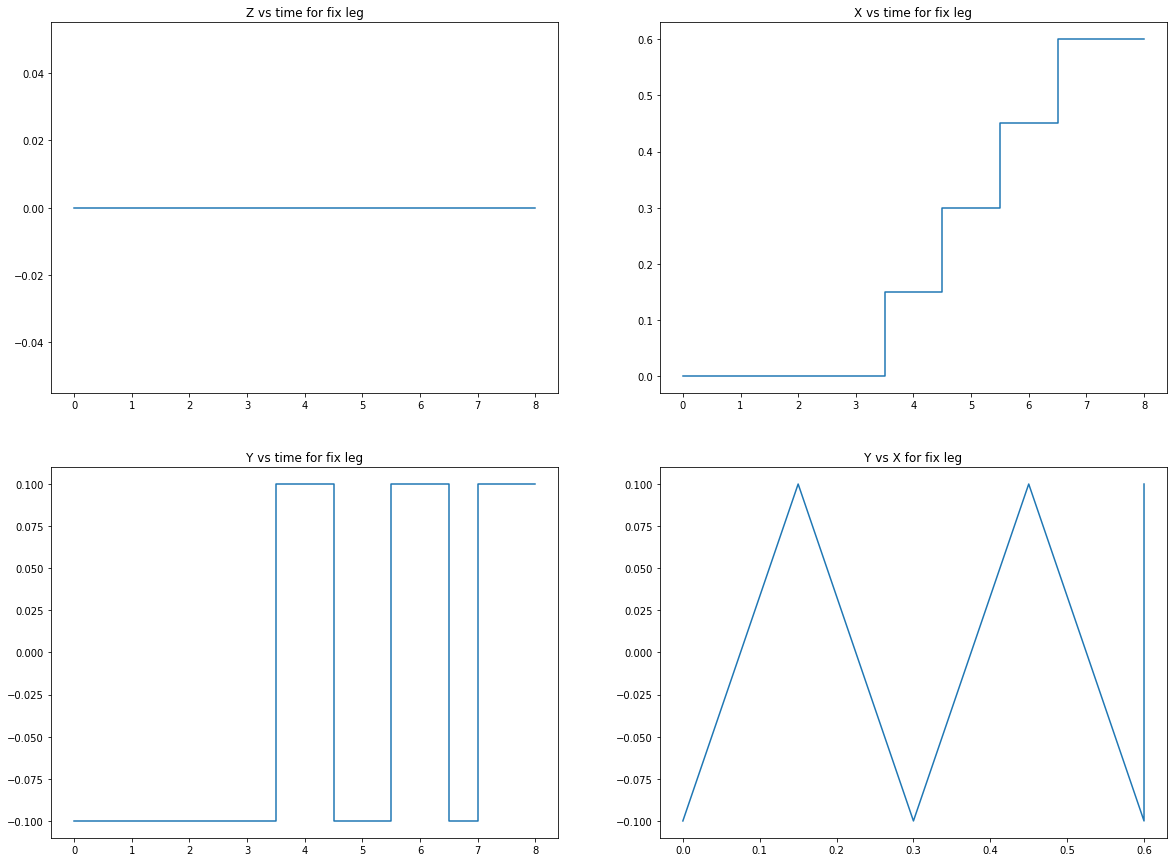

In [28]:
# fixed leg data
def const_var( x0,y0,z0, tf,t0 ):
    t = 0
    dt = tf/100
    x_data = []
    y_data = []
    z_data = []
    t_data = []

    while t <= tf+dt :
        x_data.append(x0)
        y_data.append(y0)
        z_data.append(z0)
        t_data.append(t+t0)
        t += dt
    return x_data,y_data,z_data,t_data

def fix_leg_data():
    tf=[ 1   ,    1 ,  1   ,  0.5 ,    1 ,     1 ,    1 ,   0.5 ,     1]
    y =[-0.1, -0.1, -0.1,  -0.1, 0.1,  -0.1,   0.1,  -0.1,   0.1]
    z =[0   ,     0 ,    0 ,    0 ,    0 ,     0 ,    0 ,     0 ,     0]
    x =[0   ,     0 ,    0 ,    0,   0.15,  0.3 ,  0.45,   0.60,  0.60]

    t0 = 0
    xf_data ,yf_data ,zf_data = [],[],[]
    tf_data = []

    for i in range(9):
        xf_data0,yf_data0,zf_data0,tf_data0 = const_var(x[i],y[i],z[i],tf[i],t0)
        t0 += tf[i]
        xf_data.extend(xf_data0)
        tf_data.extend(tf_data0)
        yf_data.extend(yf_data0)
        zf_data.extend(zf_data0)

    return  xf_data ,yf_data ,zf_data ,tf_data
    
xf_data ,yf_data ,zf_data ,tf_data = fix_leg_data()

import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,2,figsize=(20,15))
axes[0,0].set_title("Z vs time for fix leg")
axes[0,0].plot(tf_data   , zf_data) 
axes[0,1].set_title("X vs time for fix leg")
axes[0,1].plot(tf_data   , xf_data) 
axes[1,0].set_title("Y vs time for fix leg")
axes[1,0].plot(tf_data   , yf_data) 
axes[1,1].set_title("Y vs X for fix leg")
axes[1,1].plot(xf_data   , yf_data) 
plt.show()

In [29]:
# calculating in the global coordinate system 
'''
for COM we have x_com ,y_com ,z_com
for swing lwg we have x_data ,y_data ,z_data
for fix leg we have xf_data ,yf_data,zf_data
and time is same i.e. t_com == t_data == tf_data we will use t_data

we will make a list of touple at each instace of time 

touple will consist of ( (com coordinates) , (swing leg coordinates) , (fix leg coordinate))

'''
ordinate_data = []
swing_leg_global = [ [], [] , []]
com_global = [ [] , [] , [] ]
for i in range(len(t_data)):
    com_ordinate = ( x_com[i]  + xf_data[i]  , y_com[i] + yf_data[i]  , z_com[i]  )
    sl_ordinate  = ( x_data[i] + xf_data[i]  , y_data[i]  , z_data[i] )
    fl_ordinate  = ( xf_data[i]              , yf_data[i] , zf_data[i])

    ordinate_data.append( (com_ordinate ,sl_ordinate , fl_ordinate )  )
    swing_leg_global[0].append( sl_ordinate[0])
    swing_leg_global[1].append( sl_ordinate[1])
    swing_leg_global[2].append( sl_ordinate[2])

    com_global[0].append( com_ordinate[0])
    com_global[1].append( com_ordinate[1])
    com_global[2].append( com_ordinate[2])



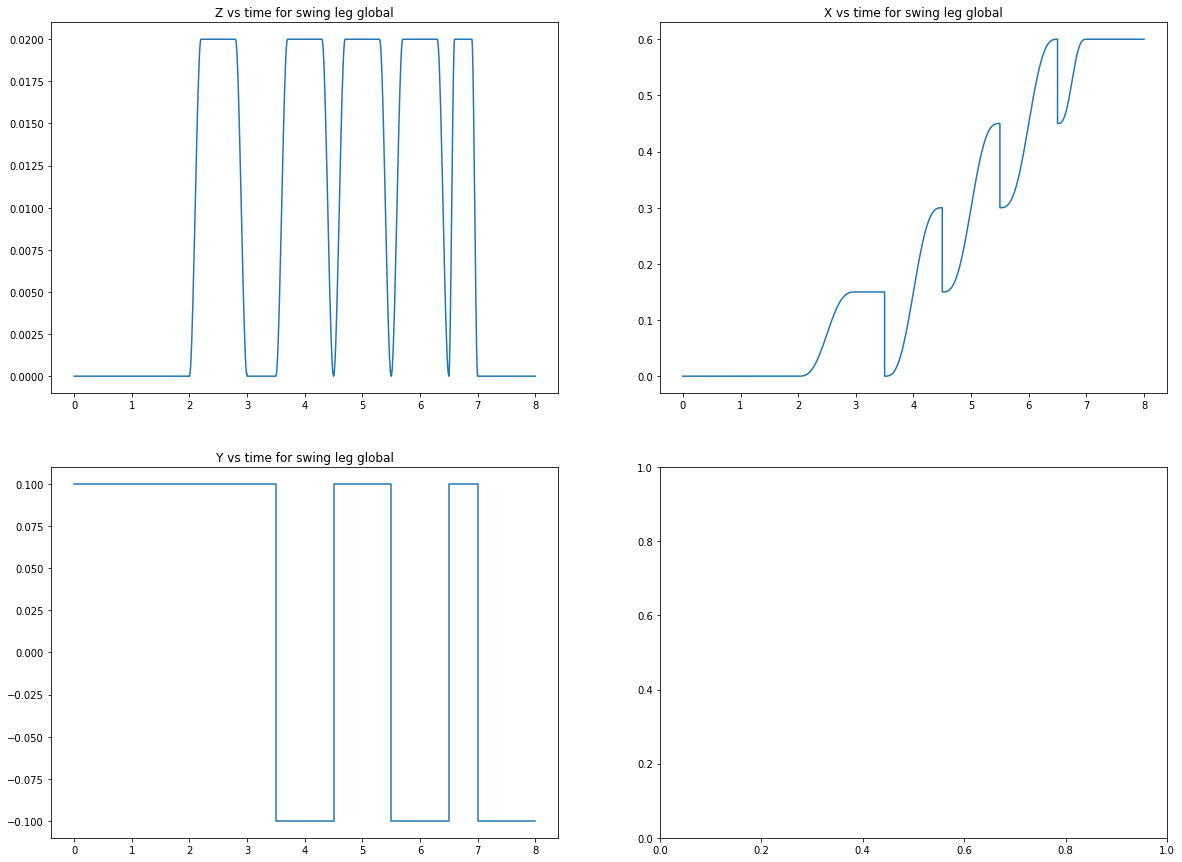

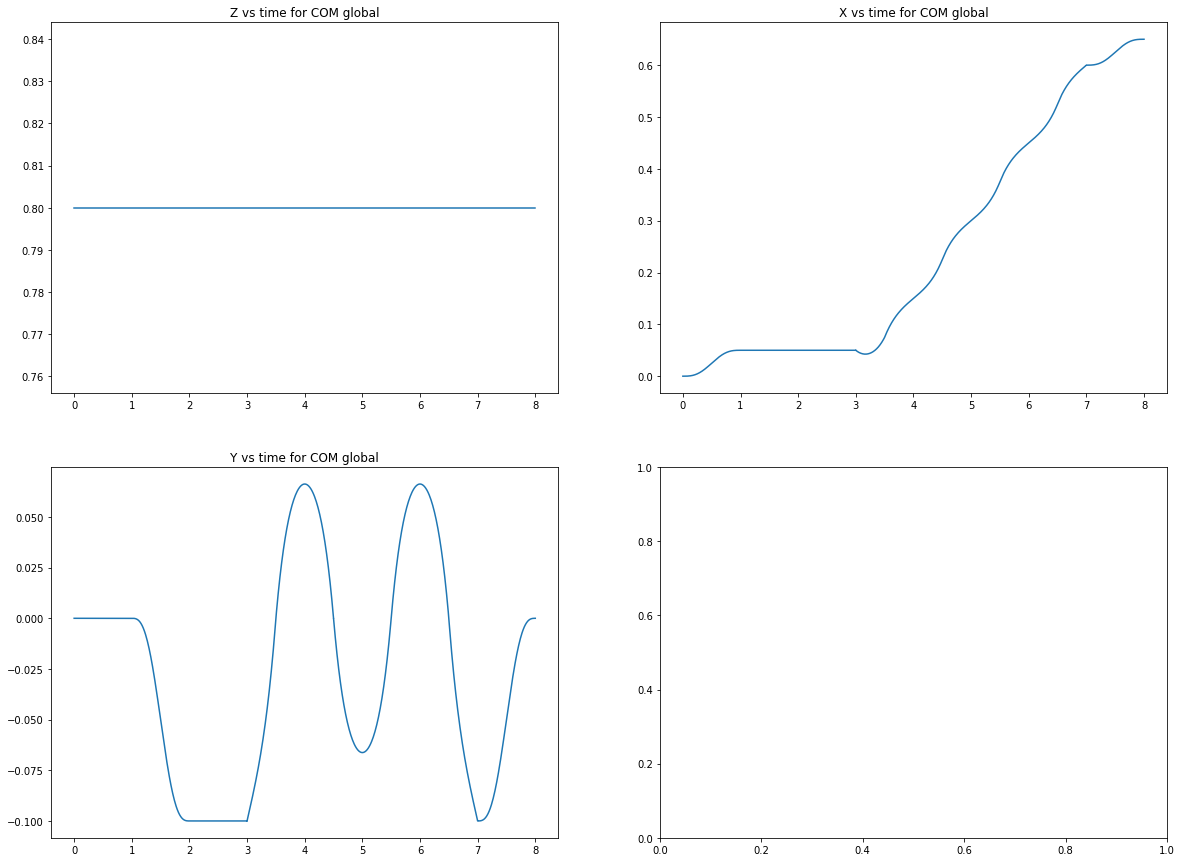

In [30]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,2,figsize=(20,15))
axes[0,0].set_title("Z vs time for swing leg global")
axes[0,0].plot(t_data   , swing_leg_global[2]) 
axes[0,1].set_title("X vs time for swing leg global")
axes[0,1].plot(t_data   , swing_leg_global[0]) 
axes[1,0].set_title("Y vs time for swing leg global")
axes[1,0].plot(t_data   , swing_leg_global[1]) 
plt.show()


fig,axes = plt.subplots(2,2,figsize=(20,15))
axes[0,0].set_title("Z vs time for COM global")
axes[0,0].plot(t_data   , com_global[2]) 
axes[0,1].set_title("X vs time for COM global")
axes[0,1].plot(t_data   , com_global[0]) 
axes[1,0].set_title("Y vs time for COM global")
axes[1,0].plot(t_data   , com_global[1]) 
plt.show()



In [31]:
!pip install celluloid

In [32]:
# simulating combined motion
def plotc(ordinate_data ):
        import matplotlib.pyplot as plt
        from celluloid import Camera
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure()
        camera = Camera(fig)
        axis = plt.axes(projection='3d')
        axis = Axes3D(fig)
       
        axis.set_xlabel('$X$')
        axis.set_ylabel('$Y$')
        axis.set_zlabel('$Z$')
        axis.set_title("3D simulation")
  
        line1, = axis.plot([], [],[], lw = 3,color='orange')  
        line2, = axis.plot([], [],[], lw = 3,color='orange')  

       
    

        for i in range(len(ordinate_data)):

            if i % 50 == 0 :
                print(i)

            points = ordinate_data[i]
            r = axis.plot3D( [points[0][0]] , [ points[0][1] ] , [ points[0][2] ] , 'b.')
            line1 = axis.plot([points[0][0],points[1][0]], [points[0][1],points[1][1]],[points[0][2],points[1][2]], lw = 1, color='orange') 
            line2 = axis.plot([points[0][0],points[2][0]], [points[0][1],points[2][1]],[points[0][2],points[2][2]], lw = 1, color='orange') 
                       
            camera.snap()

        animation = camera.animate(interval = 20, repeat = False)
                          
        animation.save("Multistep_3D" + '.gif' , writer='pillow')


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900


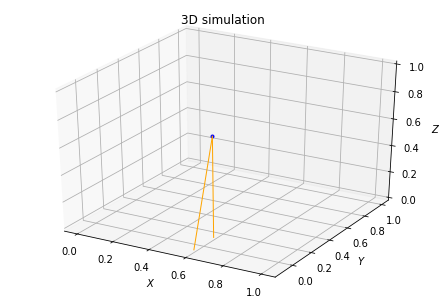

In [33]:
plotc(ordinate_data )

In [34]:
def plot_2d_top( ordinate_data):

        import matplotlib.pyplot as plt
        from matplotlib.animation import FuncAnimation 
        from mpl_toolkits.mplot3d import Axes3D
        from matplotlib.animation import PillowWriter
        fig = plt.figure()
        # axis = plt.axes(projection='3d')
        # axis = Axes3D(fig)
        axis = plt.axes()
        axis.set_xlabel('$X$')
        axis.set_ylabel('$Y$')
        axis.set_title("Top view")
        line1, = axis.plot([], [], lw = 3  ,color='orange',label='Swing foot')  
        line2, = axis.plot([], [], lw = 3 ,color='orange',label='Fixed foot')  
        
        

        def animate(i): 
            if i % 50 == 0 :
                print(i)

            points = ordinate_data[i]
            r = axis.plot( [points[0][0]] , [ points[0][1] ]  , 'b.')
            line2.set_data([points[0][0],points[1][0]], [points[0][1],points[1][1]]) 
            line1.set_data([points[0][0],points[2][0]], [points[0][1],points[2][1]])
            
            return line1, line2  
   
        anim = FuncAnimation(fig, animate, init_func = None, 
                     frames = len(ordinate_data), interval = 200, blit = True) 
        writergif = PillowWriter(fps=30) 
        anim.save("2d_top_view.gif", writer=writergif)

0
0
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900


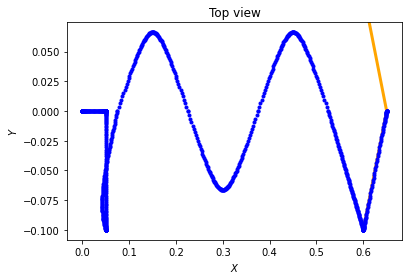

In [35]:
plot_2d_top( ordinate_data)

In [36]:
def plot_2d_side( ordinate_data):

        import matplotlib.pyplot as plt
        from matplotlib.animation import FuncAnimation 
        from mpl_toolkits.mplot3d import Axes3D
        from matplotlib.animation import PillowWriter
        fig = plt.figure()
        # axis = plt.axes(projection='3d')
        # axis = Axes3D(fig)
        axis = plt.axes()
        axis.set_xlabel('$X$')
        axis.set_ylabel('$Z$')
        axis.set_title("Side view")
        line1, = axis.plot([], [], lw = 3  ,color='orange',label='Swing foot')  
        line2, = axis.plot([], [], lw = 3 ,color='orange',label='Fixed foot')  
        r = axis.plot( 0 , 0  , 'b.')
        

        def animate(i): 
            if i % 50 == 0 :
                print(i)

            points = ordinate_data[i]
            r = axis.plot( [points[0][0]] , [ points[0][2] ]  , 'b.')
            line2.set_data([points[0][0],points[1][0]], [points[0][2],points[1][2]]) 
            line1.set_data([points[0][0],points[2][0]], [points[0][2],points[2][2]])
            
            return line1, line2  
   
        anim = FuncAnimation(fig, animate, init_func = None, 
                     frames = len(ordinate_data), interval = 200, blit = True) 
        writergif = PillowWriter(fps=30) 
        anim.save("2d_side_view.gif", writer=writergif)

0
0
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900


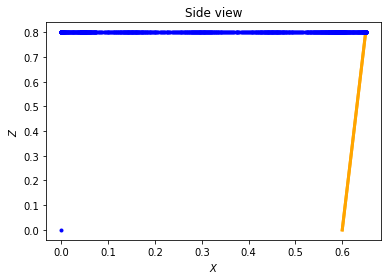

In [37]:
plot_2d_side( ordinate_data)

# Inverse Kinematics

In [40]:
## shifting clobal data to the com co ordinate axis

In [41]:
def com_frame(ordinate_data):

    oc_data = []
    sl_com , fl_com = [[],[],[]] , [[],[],[]]
    for i in range(len(ordinate_data)):
        points = ordinate_data[i]
        oc_data.append((
            (0  ,  0 ,    0) , # com which is zero
            ( points[0][0] - points[1][0] , points[0][1] - points[1][1] , points[0][2] - points[1][2]   ) ,
            ( points[0][0] - points[2][0] , points[0][1] - points[2][1] , points[0][2] - points[2][2]   )
        ) )

        sl_com[0].append(points[0][0] - points[1][0])
        sl_com[1].append(points[0][1] - points[1][1])
        sl_com[2].append(points[0][2] - points[1][2])

        fl_com[0].append(points[0][0] - points[2][0])
        fl_com[1].append(points[0][1] - points[2][1])
        fl_com[2].append(points[0][2] - points[2][2])



    return oc_data , sl_com , fl_com 

oc_data , sl_com , fl_com  = com_frame(ordinate_data)


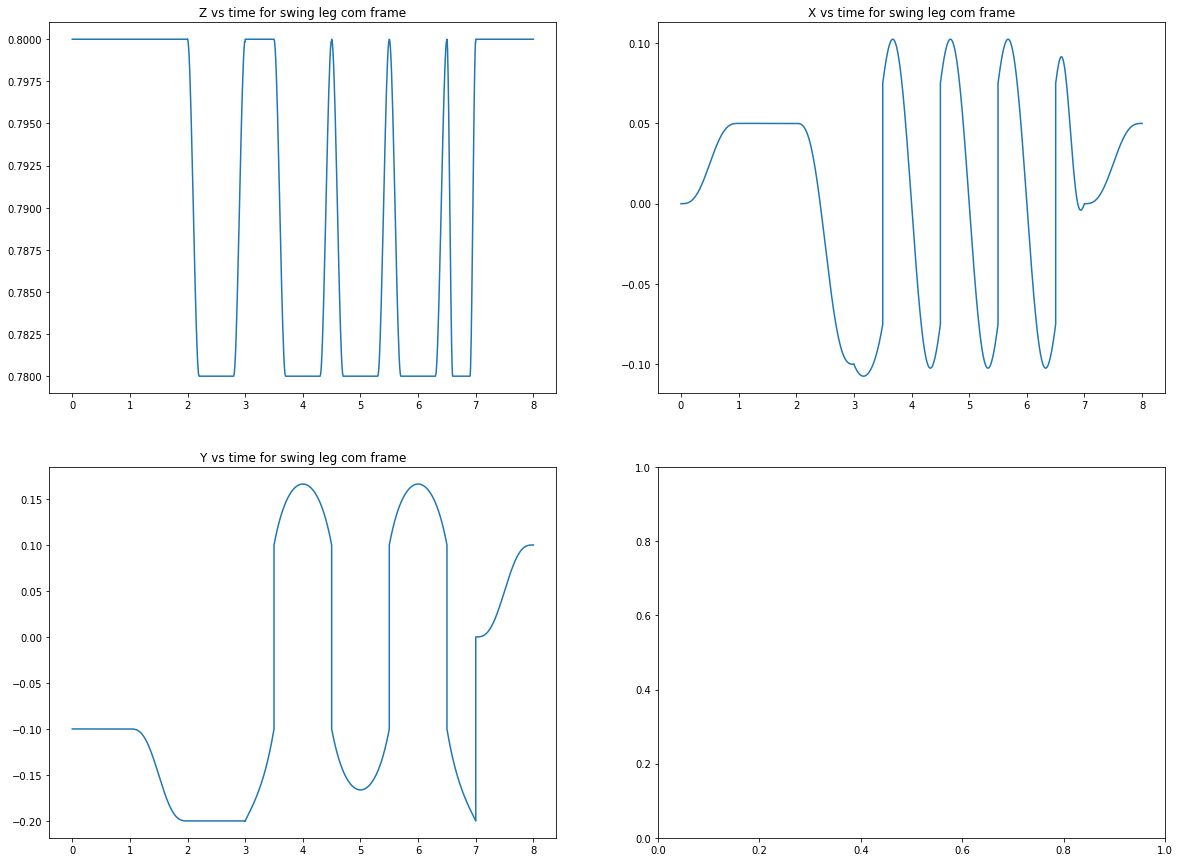

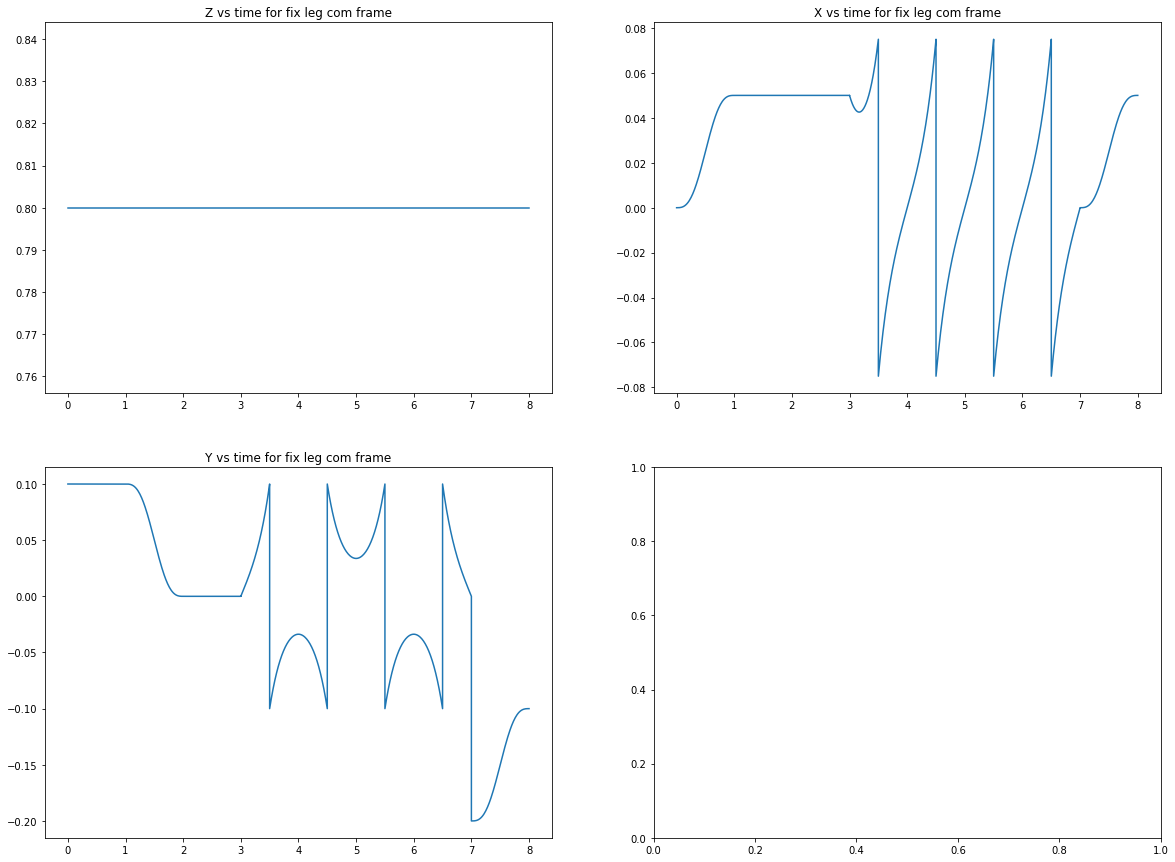

In [42]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,2,figsize=(20,15))
axes[0,0].set_title("Z vs time for swing leg com frame")
axes[0,0].plot(t_data   , sl_com[2]) 
axes[0,1].set_title("X vs time for swing leg com frame")
axes[0,1].plot(t_data   , sl_com[0]) 
axes[1,0].set_title("Y vs time for swing leg com frame")
axes[1,0].plot(t_data   , sl_com[1]) 
plt.show()

fig,axes = plt.subplots(2,2,figsize=(20,15))
axes[0,0].set_title("Z vs time for fix leg com frame")
axes[0,0].plot(t_data   , fl_com[2]) 
axes[0,1].set_title("X vs time for fix leg com frame")
axes[0,1].plot(t_data   , fl_com[0]) 
axes[1,0].set_title("Y vs time for fix leg com frame")
axes[1,0].plot(t_data   , fl_com[1]) 
plt.show()